<a href="https://colab.research.google.com/github/apurva-am/apurva-am.github.io/blob/main/Cryptocurrency_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as mlp
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
import time as t
import matplotlib.dates as mdates

In [ ]:
pip install pycoingecko

In [ ]:
from pycoingecko import CoinGeckoAPI

In [ ]:
c = CoinGeckoAPI()

In [ ]:
#get a list of digital assets sorted by ids
coinList = c.get_coins_list()
coinDataFrame = pd.DataFrame.from_dict(coinList).sort_values('id').reset_index(drop=True)
coinDataFrame

,id,symbol,name
0,01coin,zoc,01coin
1,0chain,zcn,Zus
2,0vix-protocol,vix,0VIX Protocol
3,0x,zrx,0x Protocol
4,0x0-ai-ai-smart-contract,0x0,0x0.ai: AI Smart Contract
...,...,...,...
10043,zynergy,zyn,Zynergy
10044,zyro,zyro,Zyro
10045,zyrri,zyr,Zyrri
10046,zyx,zyx,ZYX


In [ ]:
#get a list of coins orderd in descending order of market cap
coinsMktDataByIds = c.get_coins_markets(vs_currency = 'usd', order = 'market_cap_desc')
df1 = pd.DataFrame.from_dict(coinsMktDataByIds).reset_index(drop=True)
df1.head(10)

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29402.000000,572018899567,1,6.177969e+11,8.182359e+09,29494.000000,...,2.100000e+07,2.100000e+07,69045.000000,-57.42658,2021-11-10T14:24:11.849Z,67.810000,43249.28899,2013-07-06T00:00:00.000Z,None,2023-07-31T06:32:44.929Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1864.980000,224136751247,2,2.241368e+11,6.821158e+09,1882.270000,...,1.201811e+08,NaN,4878.260000,-61.78720,2021-11-10T14:24:19.604Z,0.432979,430433.72498,2015-10-20T00:00:00.000Z,"{'times': 83.80880691086087, 'currency': 'btc'...",2023-07-31T06:32:45.926Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999362,83810023806,3,8.381002e+10,1.535188e+10,1.001000,...,8.381813e+10,NaN,1.320000,-24.42697,2018-07-24T00:00:00.000Z,0.572521,74.64918,2015-03-02T00:00:00.000Z,None,2023-07-31T06:30:00.305Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,242.980000,37400750996,4,4.861782e+10,3.969559e+08,244.170000,...,1.538562e+08,2.000000e+08,686.310000,-64.60137,2021-05-10T07:24:17.097Z,0.039818,610038.59309,2017-10-19T00:00:00.000Z,None,2023-07-31T06:32:42.641Z
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.706035,37204905420,5,7.060578e+10,1.240378e+09,0.728390,...,9.998856e+10,1.000000e+11,3.400000,-79.21153,2018-01-07T00:00:00.000Z,0.002686,26200.49871,2014-05-22T00:00:00.000Z,None,2023-07-31T06:32:50.748Z
5,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,0.999798,26542423389,6,2.654223e+10,3.490489e+09,1.004000,...,2.654601e+10,NaN,1.170000,-14.74857,2019-05-08T00:40:28.300Z,0.877647,13.91244,2023-03-11T08:02:13.981Z,None,2023-07-31T06:32:51.819Z
6,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1862.150000,14775728039,7,1.475776e+10,1.296739e+08,1881.300000,...,7.938754e+06,7.938754e+06,4829.570000,-61.46090,2021-11-10T14:40:47.256Z,482.900000,285.43954,2020-12-22T04:08:21.854Z,None,2023-07-31T06:32:49.990Z
7,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.078672,11050466808,8,1.105046e+10,5.407402e+08,0.080295,...,1.403950e+11,NaN,0.731578,-89.23344,2021-05-08T05:08:23.458Z,0.000087,90535.64389,2015-05-06T00:00:00.000Z,None,2023-07-31T06:32:45.316Z
8,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.312548,10959265795,9,1.407238e+10,1.720103e+08,0.317596,...,4.500000e+10,4.500000e+10,3.090000,-89.87636,2021-09-02T06:00:10.474Z,0.019253,1523.18608,2020-03-13T02:22:55.044Z,None,2023-07-31T06:32:43.792Z
9,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,24.500000,9891282420,10,1.354369e+10,4.023285e+08,25.050000,...,5.536894e+08,NaN,259.960000,-90.58871,2021-11-06T21:54:35.825Z,0.500801,4785.27520,2020-05-11T19:35:23.449Z,None,2023-07-31T06:32:42.822Z


In [ ]:
#get a list of stable coins
stable_coinsMktDataByCategory = c.get_coins_markets(vs_currency = 'usd',order = 'market_cap_desc', category = 'stablecoins')
df2 = pd.DataFrame.from_dict(stable_coinsMktDataByCategory).reset_index(drop=True)
df2.shape
df2

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999362,8.381002e+10,3.0,8.381002e+10,1.535188e+10,1.001000,...,8.381813e+10,NaN,1.320,-24.42697,2018-07-24T00:00:00.000Z,0.572521,74.64918,2015-03-02T00:00:00.000Z,None,2023-07-31T06:30:00.305Z
1,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,0.999798,2.654242e+10,6.0,2.654223e+10,3.490489e+09,1.004000,...,2.654601e+10,NaN,1.170,-14.74857,2019-05-08T00:40:28.300Z,0.877647,13.91244,2023-03-11T08:02:13.981Z,None,2023-07-31T06:32:51.819Z
2,dai,dai,Dai,https://assets.coingecko.com/coins/images/9956...,1.000000,4.144322e+09,22.0,4.144322e+09,1.163281e+08,1.003000,...,4.143668e+09,NaN,1.220,-17.95212,2020-03-13T03:02:50.373Z,0.881960,13.39594,2023-03-11T07:50:50.514Z,None,2023-07-31T06:30:00.146Z
3,binance-usd,busd,Binance USD,https://assets.coingecko.com/coins/images/9576...,0.999011,3.703025e+09,24.0,3.703025e+09,2.408305e+09,1.005000,...,3.704618e+09,NaN,1.150,-13.30259,2020-03-13T02:35:42.953Z,0.901127,11.04592,2021-05-19T13:04:37.445Z,None,2023-07-31T06:32:49.203Z
4,true-usd,tusd,TrueUSD,https://assets.coingecko.com/coins/images/3449...,0.998517,3.054183e+09,26.0,3.054183e+09,2.708162e+08,1.001000,...,3.057575e+09,NaN,1.620,-38.28420,2018-08-26T20:41:09.375Z,0.883550,13.05283,2020-03-12T10:47:51.380Z,None,2023-07-31T06:32:50.881Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,synth-ousd,ousd,Synth oUSD,https://assets.coingecko.com/coins/images/1683...,0.990473,0.000000e+00,NaN,4.245800e+04,4.437000e+01,NaN,...,4.286677e+04,NaN,2.850,-65.28670,2022-11-09T00:04:50.354Z,0.202652,388.75593,2022-09-23T21:33:50.646Z,None,2023-07-28T09:20:58.646Z
80,klaytn-dai,kdai,Klaytn Dai,https://assets.coingecko.com/coins/images/2701...,0.996691,0.000000e+00,NaN,NaN,1.480119e+04,1.006000,...,NaN,NaN,1.920,-47.79951,2022-11-30T02:02:08.082Z,0.579195,72.63989,2022-10-23T20:00:40.694Z,None,2023-07-31T06:26:50.472Z
81,first-digital-usd,fdusd,First Digital USD,https://assets.coingecko.com/coins/images/3107...,0.999601,0.000000e+00,NaN,NaN,6.774500e+04,1.006000,...,NaN,NaN,1.006,-0.42474,2023-07-30T19:53:33.531Z,0.996608,0.49263,2023-07-26T21:31:37.744Z,None,2023-07-31T06:30:38.118Z
82,decentralized-usd,dusd,Decentralized USD,https://assets.coingecko.com/coins/images/2434...,0.471191,0.000000e+00,NaN,NaN,1.721010e+05,0.476856,...,NaN,NaN,1.150,-59.09387,2022-07-18T09:43:47.613Z,0.336905,39.90111,2023-05-25T09:50:46.723Z,None,2023-07-31T06:32:48.425Z


In [ ]:

# Merge the data frames with indicator=True
merged_df = df1.merge(df2, on=['id'], how='left', indicator=True)

# Filter out rows where the indicator value is 'left_only' to exclude the values in df2
Top_10_assets_excluding_stablecoins = merged_df[merged_df['_merge'] == 'left_only']

# Drop the '_merge' column if not needed
Top_10_assets_excluding_stablecoins.drop(columns=['_merge'], inplace=True)

# Reset the index of df3
Top_10_assets_excluding_stablecoins.reset_index(drop=True, inplace=True)

# Display the resulting data frame df3
print(Top_10_assets_excluding_stablecoins)


                    id symbol_x             name_x  \
0              bitcoin      btc            Bitcoin   
1             ethereum      eth           Ethereum   
2          binancecoin      bnb                BNB   
3               ripple      xrp                XRP   
4         staked-ether    steth  Lido Staked Ether   
..                 ...      ...                ...   
85         huobi-token       ht              Huobi   
86       mina-protocol     mina      Mina Protocol   
87                 sui      sui                Sui   
88       conflux-token      cfx            Conflux   
89  trust-wallet-token      twt       Trust Wallet   

                                              image_x  current_price_x  \
0   https://assets.coingecko.com/coins/images/1/la...     29402.000000   
1   https://assets.coingecko.com/coins/images/279/...      1864.980000   
2   https://assets.coingecko.com/coins/images/825/...       242.980000   
3   https://assets.coingecko.com/coins/images/44/l...  

<ipython-input-10-d350005e9cb1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_10_assets_excluding_stablecoins.drop(columns=['_merge'], inplace=True)


In [ ]:
#listing the top 10 assets excluding stablecoins
Top_10_assets_excluding_stablecoins.head(10)

,id,symbol_x,name_x,image_x,current_price_x,market_cap_x,market_cap_rank_x,fully_diluted_valuation_x,total_volume_x,high_24h_x,...,total_supply_y,max_supply_y,ath_y,ath_change_percentage_y,ath_date_y,atl_y,atl_change_percentage_y,atl_date_y,roi_y,last_updated_y
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29402.000000,572018899567,1,6.177969e+11,8.182359e+09,29494.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1864.980000,224136751247,2,2.241368e+11,6.821158e+09,1882.270000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,242.980000,37400750996,4,4.861782e+10,3.969559e+08,244.170000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.706035,37204905420,5,7.060578e+10,1.240378e+09,0.728390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1862.150000,14775728039,7,1.475776e+10,1.296739e+08,1881.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.078672,11050466808,8,1.105046e+10,5.407402e+08,0.080295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.312548,10959265795,9,1.407238e+10,1.720103e+08,0.317596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,24.500000,9891282420,10,1.354369e+10,4.023285e+08,25.050000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,tron,trx,TRON,https://assets.coingecko.com/coins/images/1094...,0.079942,7168396490,11,7.168390e+09,3.118309e+08,0.082859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,litecoin,ltc,Litecoin,https://assets.coingecko.com/coins/images/2/la...,93.390000,6862246320,12,7.844733e+09,9.639474e+08,95.620000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Top_10_assets_excluding_stablecoins.columns

Index(['id', 'symbol_x', 'name_x', 'image_x', 'current_price_x',
       'market_cap_x', 'market_cap_rank_x', 'fully_diluted_valuation_x',
       'total_volume_x', 'high_24h_x', 'low_24h_x', 'price_change_24h_x',
       'price_change_percentage_24h_x', 'market_cap_change_24h_x',
       'market_cap_change_percentage_24h_x', 'circulating_supply_x',
       'total_supply_x', 'max_supply_x', 'ath_x', 'ath_change_percentage_x',
       'ath_date_x', 'atl_x', 'atl_change_percentage_x', 'atl_date_x', 'roi_x',
       'last_updated_x', 'symbol_y', 'name_y', 'image_y', 'current_price_y',
       'market_cap_y', 'market_cap_rank_y', 'fully_diluted_valuation_y',
       'total_volume_y', 'high_24h_y', 'low_24h_y', 'price_change_24h_y',
       'price_change_percentage_24h_y', 'market_cap_change_24h_y',
       'market_cap_change_percentage_24h_y', 'circulating_supply_y',
       'total_supply_y', 'max_supply_y', 'ath_y', 'ath_change_percentage_y',
       'ath_date_y', 'atl_y', 'atl_change_percentage_y', '

In [ ]:
# print a dataframe of the top 10 assets with columns id, name, current price and total volume
TOP_10 = Top_10_assets_excluding_stablecoins[['id','name_x','current_price_x','total_volume_x']].head(10)
TOP_10

,id,name_x,current_price_x,total_volume_x
0,bitcoin,Bitcoin,29402.000000,8.182359e+09
1,ethereum,Ethereum,1864.980000,6.821158e+09
2,binancecoin,BNB,242.980000,3.969559e+08
3,ripple,XRP,0.706035,1.240378e+09
4,staked-ether,Lido Staked Ether,1862.150000,1.296739e+08
5,dogecoin,Dogecoin,0.078672,5.407402e+08
6,cardano,Cardano,0.312548,1.720103e+08
7,solana,Solana,24.500000,4.023285e+08
8,tron,TRON,0.079942,3.118309e+08
9,litecoin,Litecoin,93.390000,9.639474e+08


In [ ]:
top_10_coin_names = Top_10_assets_excluding_stablecoins['name_x'].head(10).tolist()
top_10_coin_names

['Bitcoin',
 'Ethereum',
 'BNB',
 'XRP',
 'Lido Staked Ether',
 'Dogecoin',
 'Cardano',
 'Solana',
 'TRON',
 'Litecoin']

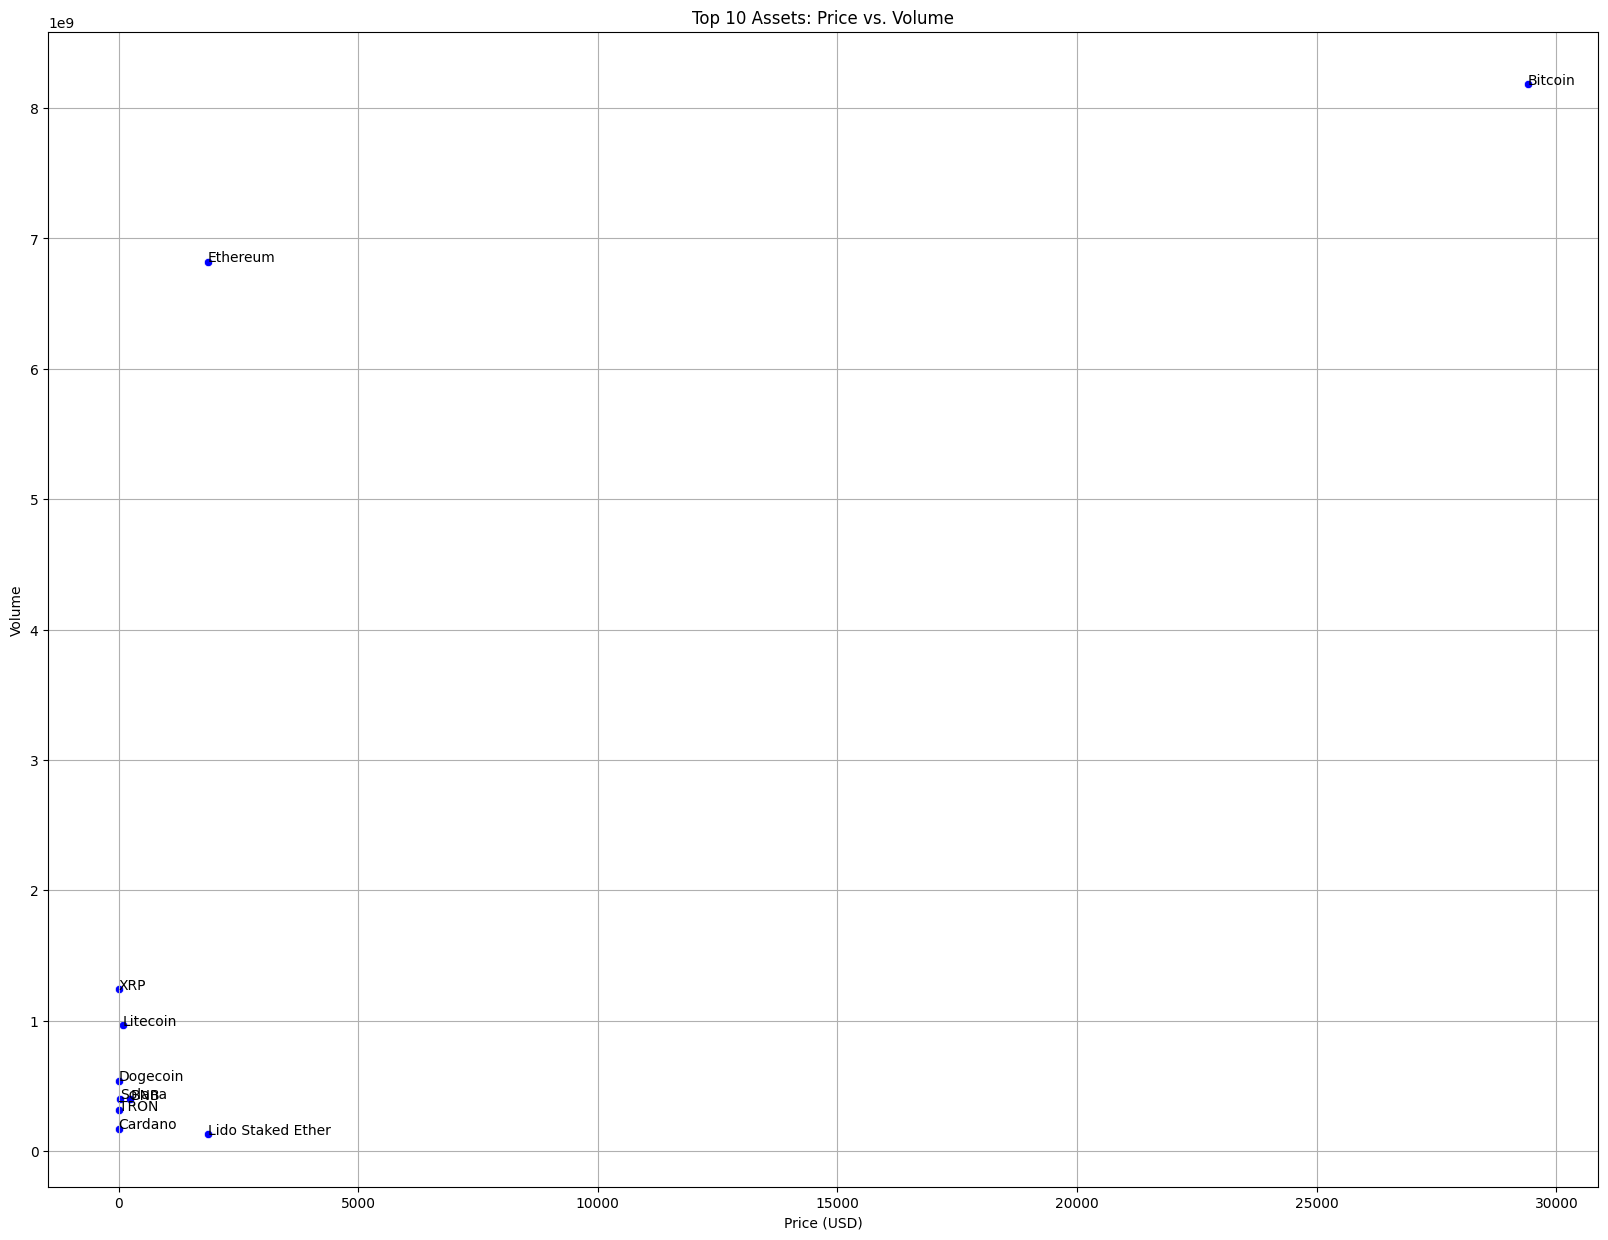

In [ ]:
# plot visualizes the relationship between the price and volume of the top 10 assets
import matplotlib.pyplot as plt
import seaborn as sns

TOP_10 = Top_10_assets_excluding_stablecoins[['name_x', 'current_price_x', 'total_volume_x']].head(10)

# Create a scatter plot for price vs volume using Seaborn
plt.figure(figsize=(20, 15))
sns.scatterplot(x='current_price_x', y='total_volume_x', data=TOP_10, marker='o', color='blue', edgecolors='black')

# Customize the plot
plt.xlabel('Price (USD)')
plt.ylabel('Volume')
plt.title('Top 10 Assets: Price vs. Volume')
plt.grid(True)

# Add labels for each data point
for i, name in enumerate(TOP_10['name_x']):
    plt.annotate(name, (TOP_10['current_price_x'].iloc[i], TOP_10['total_volume_x'].iloc[i]), fontsize=10)

# Show the plot
plt.show()

In [ ]:
#get historical data
import requests

# Convert the dates to timestamps
start_date = dt.datetime(2020, 1, 1).timestamp()
end_date = dt.datetime(2023, 7, 15).timestamp()

# Get daily historical data for the specified date range
response = requests.get(f"https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range",
                        params={"vs_currency": "usd", "from": start_date, "to": end_date})
dailyHistoricalData = response.json()

# Extract price and volume data
data_points = dailyHistoricalData['prices']
timestamps = [data[0] for data in data_points]
prices = [data[1] for data in data_points]

volume_data_points = dailyHistoricalData['total_volumes']
volumes = [data[1] for data in volume_data_points]

# Convert timestamps to human-readable dates
dates = [dt.datetime.fromtimestamp(ts / 1000).strftime('%Y-%m-%d') for ts in timestamps]

# Create a DataFrame
df = pd.DataFrame({'Date': dates, 'Price (USD)': prices, 'Volume': volumes})

# Display the DataFrame
print(df)

            Date   Price (USD)        Volume
0     2020-01-01   7195.153895  2.118788e+10
1     2020-01-02   7193.754668  1.812352e+10
2     2020-01-03   6963.853354  2.031319e+10
3     2020-01-04   7300.346935  3.101578e+10
4     2020-01-05   7351.377053  2.061164e+10
...          ...           ...           ...
1287  2023-07-11  30394.281146  1.283522e+10
1288  2023-07-12  30620.814247  1.175342e+10
1289  2023-07-13  30407.416314  1.307256e+10
1290  2023-07-14  31446.014971  2.125427e+10
1291  2023-07-15  30311.827808  2.197715e+10

[1292 rows x 3 columns]


In [ ]:
import datetime as dt

# Convert the dates to datetime objects
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2023, 7, 15)

# Convert datetime objects to Unix timestamps
start_timestamp = int(start_date.timestamp())
end_timestamp = int(end_date.timestamp())

print("Start Date:", start_date.strftime('%Y-%m-%d %H:%M:%S'))
print("Start Timestamp:", start_timestamp)

print("End Date:", end_date.strftime('%Y-%m-%d %H:%M:%S'))
print("End Timestamp:", end_timestamp)

Start Date: 2020-01-01 00:00:00
Start Timestamp: 1577836800
End Date: 2023-07-15 00:00:00
End Timestamp: 1689379200


In [ ]:
#input a range of timestamps to get data for using predetermined frequency
chartRange = c.get_coin_market_chart_range_by_id(id = 'bitcoin',
                                                  vs_currency = 'usd',
                                                  from_timestamp = 1577836800,
                                                  to_timestamp = 1689379200)

In [ ]:
Bitcoin_historicaldata = pd.DataFrame.from_dict(chartRange).reset_index(drop=True)
Bitcoin_historicaldata.head()

,prices,market_caps,total_volumes
0,"[1577836800000, 7195.153895430029]","[1577836800000, 130394101535.60994]","[1577836800000, 21187883711.18498]"
1,"[1577923200000, 7193.7546679601]","[1577923200000, 130422953817.668]","[1577923200000, 18123516838.8979]"
2,"[1578009600000, 6963.853353983485]","[1578009600000, 126280790200.20206]","[1578009600000, 20313194628.09452]"
3,"[1578096000000, 7300.34693530511]","[1578096000000, 132766262579.09486]","[1578096000000, 31015776262.21867]"
4,"[1578182400000, 7351.377053166627]","[1578182400000, 133474716218.18333]","[1578182400000, 20611640058.34164]"


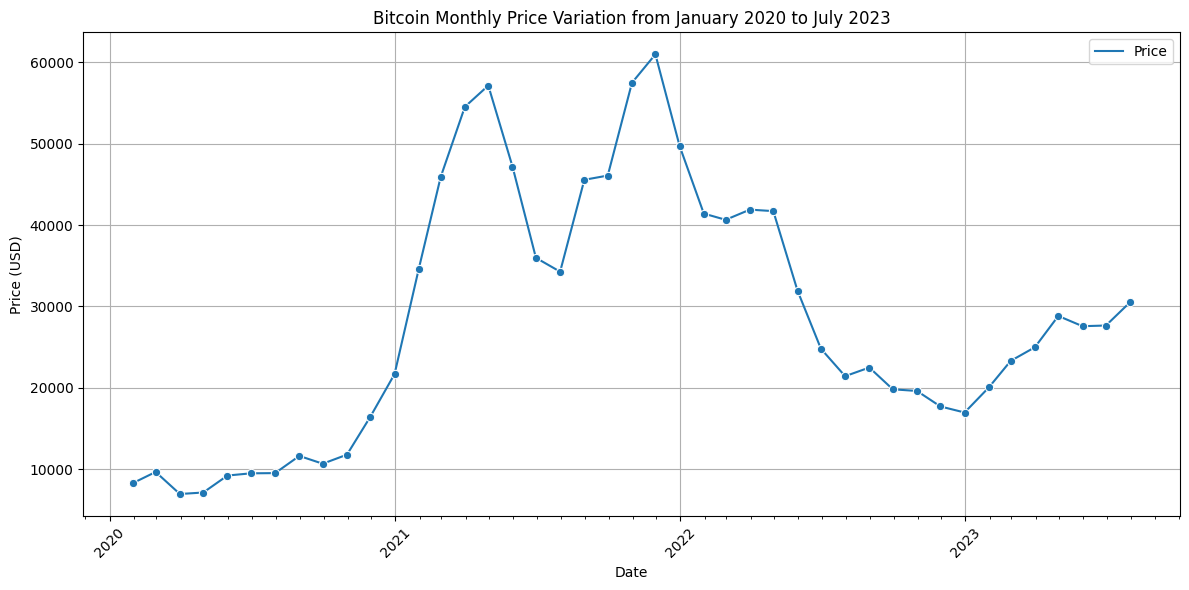

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd

bitcoin_data = c.get_coin_market_chart_range_by_id(id='bitcoin',
                                                  vs_currency='usd',
                                                  from_timestamp=1577836800,
                                                  to_timestamp=1689379200)

if bitcoin_data:
    # Extract price and timestamp data from the JSON response
    data_points = bitcoin_data['prices']
    timestamps = [data[0] for data in data_points]
    prices = [data[1] for data in data_points]

    # Convert timestamps to human-readable dates
    dates = [dt.datetime.fromtimestamp(ts / 1000).strftime('%Y-%m-%d') for ts in timestamps]

    # Create a DataFrame with date and price data
    df = pd.DataFrame({'Date': dates, 'Price': prices})
    df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format
    df.set_index('Date', inplace=True)  # Set 'Date' column as the DataFrame index

    # Resample data to monthly frequency and calculate monthly mean prices
    monthly_prices = df.resample('M').mean()

    # Plot monthly price over time using seaborn
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_prices, marker='o', color='blue')

    # Customize the plot
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('Bitcoin Monthly Price Variation from January 2020 to July 2023')
    plt.grid(True)

    # Adjust x-axis date ticks
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to yearly intervals
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format major ticks as year only
    plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Set minor ticks to monthly intervals

    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [ ]:
#obtaining histroical data for all the top 10 assets
Bitcoin = c.get_coin_market_chart_range_by_id(id='bitcoin', vs_currency='usd', from_timestamp=1577836800, to_timestamp=1689379200)
Ethereum = c.get_coin_market_chart_range_by_id(id='ethereum', vs_currency='usd', from_timestamp=1577836800, to_timestamp=1689379200)
Ripple = c.get_coin_market_chart_range_by_id(id='ripple', vs_currency='usd', from_timestamp=1577836800, to_timestamp=1689379200)
Binancecoin = c.get_coin_market_chart_range_by_id(id='binancecoin', vs_currency='usd', from_timestamp=1577836800, to_timestamp=1689379200)
Stakedether = c.get_coin_market_chart_range_by_id(id='staked-ether', vs_currency='usd', from_timestamp=1577836800, to_timestamp=1689379200)
Dogecoin = c.get_coin_market_chart_range_by_id(id='dogecoin', vs_currency='usd', from_timestamp=1577836800, to_timestamp=1689379200)
Cardano = c.get_coin_market_chart_range_by_id(id='cardano', vs_currency='usd', from_timestamp=1577836800, to_timestamp=1689379200)
Solana = c.get_coin_market_chart_range_by_id(id='solana', vs_currency='usd', from_timestamp=1577836800, to_timestamp=1689379200)
Tron = c.get_coin_market_chart_range_by_id(id='tron', vs_currency='usd', from_timestamp=1577836800, to_timestamp=1689379200)
Litecoin = c.get_coin_market_chart_range_by_id(id='litecoin', vs_currency='usd', from_timestamp=1577836800, to_timestamp=1689379200)

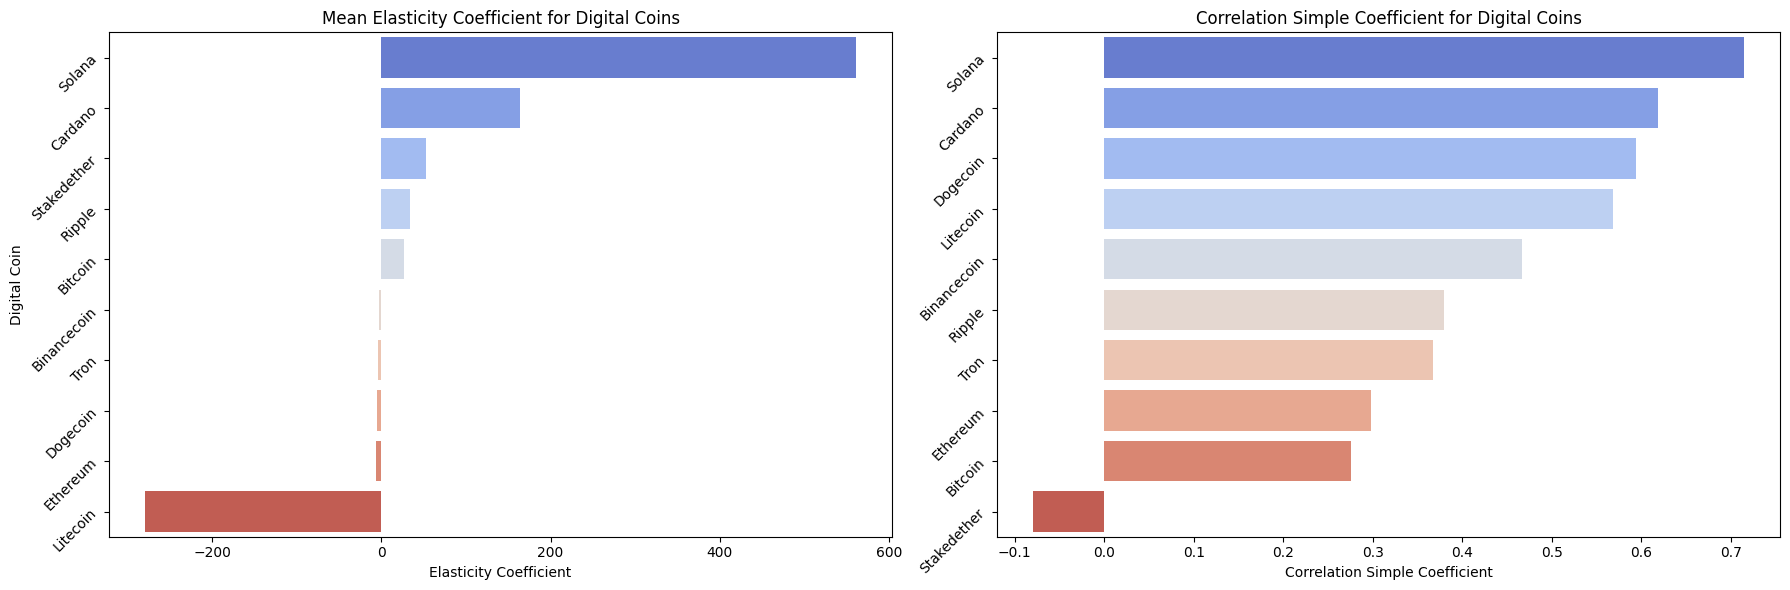

       
Solana Elasticity Coefficient: 561.86
Cardano Elasticity Coefficient: 164.02
Stakedether Elasticity Coefficient: 52.14
Ripple Elasticity Coefficient: 34.08
Bitcoin Elasticity Coefficient: 26.93
Binancecoin Elasticity Coefficient: -3.14
Tron Elasticity Coefficient: -3.98
Dogecoin Elasticity Coefficient: -5.75
Ethereum Elasticity Coefficient: -6.89
Litecoin Elasticity Coefficient: -279.94
       
Solana Correlation simple Coefficient: 0.72
Cardano Correlation simple Coefficient: 0.62
Dogecoin Correlation simple Coefficient: 0.59
Litecoin Correlation simple Coefficient: 0.57
Binancecoin Correlation simple Coefficient: 0.47
Ripple Correlation simple Coefficient: 0.38
Tron Correlation simple Coefficient: 0.37
Ethereum Correlation simple Coefficient: 0.30
Bitcoin Correlation simple Coefficient: 0.28
Stakedether Correlation simple Coefficient: -0.08
{'prices': [[1577836800000, 41.3303118717958], [1577923200000, 41.606316132725595], [1578009600000, 39.413813127257534], [1578096000000, 

In [ ]:
import datetime as dt
import numpy as np

def calculate_correlation_coefficient(coin_data_list):

    elasticity_dict = {}
    correlation_simple_dict = {}
    names= ['Bitcoin', 'Ethereum', 'Ripple', 'Binancecoin', 'Stakedether',
                  'Dogecoin', 'Cardano', 'Solana', 'Tron', 'Litecoin']
    for iter, coin in enumerate(coin_data_list):
        # Extract price and timestamp data from the JSON response
        #
        data_points = coin['prices']
        timestamps = [data[0] for data in data_points]
        prices = [data[1] for data in data_points]

        volume_data_points = coin['total_volumes']
        volumes = [data[1] for data in volume_data_points]

        # Convert timestamps to human-readable dates
        dates = [dt.datetime.fromtimestamp(ts / 1000).strftime('%Y-%m-%d') for ts in timestamps]

        price_change = [((prices[i] - prices[i-1]) / prices[i-1]) * 100 for i in range(1, len(prices))]
        volume_change = [((volumes[i] - volumes[i-1]) / volumes[i-1]) * 100 for i in range(1, len(volumes))]

        elasticity = []
        for i in range(len(price_change)):
          if price_change[i] != 0:
            el = volume_change[i]/price_change[i]
            elasticity.append(el)




        #elasticity = np.mean(volume_change/price_change)
        elasticity_coefficient = (np.mean(elasticity))
        #print(names[iter])
        elasticity_dict[names[iter]] = np.mean(elasticity)


        correlation_coefficient_simple = np.corrcoef(prices, volumes)[0, 1]
        correlation_simple_dict[names[iter]] = correlation_coefficient_simple

        # Calculate the mean elasticity coefficient for each coin
    elasticity_means = {}
    for coin_name, elasticity_coefficient in elasticity_dict.items():
        elasticity_means[coin_name] = elasticity_coefficient

    # Convert the dictionary to a DataFrame for elasticity
    elasticity_df = pd.DataFrame(list(elasticity_means.items()), columns=['Coin', 'Elasticity Coefficient'])



    #sort the elasticity in descending order
    sorted_elasticity = sorted(elasticity_dict.items(),key=lambda x: x[1], reverse=True)

    # Convert the sorted correlation dictionary to a DataFrame for correlation
    elasticity_df = pd.DataFrame(sorted_elasticity, columns=['Coin', 'Elasticity Coefficient'])


    # Sort the simple correlation dictionary based on correlation coefficients in descending order
    sorted_correlation_simple = sorted(correlation_simple_dict.items(), key=lambda x: x[1], reverse=True)


    # Convert the sorted simple correlation dictionary to a DataFrame for simple correlation
    correlation_simple_df = pd.DataFrame(sorted_correlation_simple, columns=['Coin', 'Correlation simple Coefficient'])

    # Plot mean elasticity coefficients, and simple correlation coefficients side by side
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Plot for mean elasticity coefficients
    sns.barplot(x='Elasticity Coefficient', y='Coin', data=elasticity_df, palette='coolwarm', ax=axes[0])
    axes[0].set_title('Mean Elasticity Coefficient for Digital Coins')
    axes[0].set_xlabel('Elasticity Coefficient')
    axes[0].set_ylabel('Digital Coin')
    axes[0].tick_params(axis='y', labelrotation=45)



    # Plot for simple correlation coefficients
    sns.barplot(x='Correlation simple Coefficient', y='Coin', data=correlation_simple_df, palette='coolwarm', ax=axes[1])
    axes[1].set_title('Correlation Simple Coefficient for Digital Coins')
    axes[1].set_xlabel('Correlation Simple Coefficient')
    axes[1].set_ylabel('')
    axes[1].tick_params(axis='y', labelrotation=45)

    plt.tight_layout()
    plt.show()



    print("       ")

    #sort the elasticity in descending order
    sorted_elasticity = sorted(elasticity_dict.items(),key=lambda x: x[1], reverse=True)

    # Print the elasticity coefficients in descending order
    for coin_name, elasticity_coefficient in sorted_elasticity:
        print(f'{coin_name} Elasticity Coefficient: {elasticity_coefficient:.2f}')

    print("       ")

    #sort the elasticity in descending order
    sorted_correlation_simple = sorted(correlation_simple_dict.items(),key=lambda x: x[1], reverse=True)

    # Print the elasticity coefficients in descending order
    for coin_name, correlation_simple_coefficient in sorted_correlation_simple:
        print(f'{coin_name} Correlation simple Coefficient: {correlation_simple_coefficient:.2f}')


def identify_categorical_events(coin_data_list):
    for iter, coin in enumerate(coin_data_list):
        # Extract price and timestamp data from the JSON response
        data_points = coin['prices']
        timestamps = [data[0] for data in data_points]
        prices = [data[1] for data in data_points]

        # Convert timestamps to human-readable dates
        dates = [dt.datetime.fromtimestamp(ts / 1000).strftime('%Y-%m-%d') for ts in timestamps]

        # Calculate the daily price change
        price_change = [((prices[i] - prices[i-1]) / prices[i-1]) * 100 for i in range(1, len(prices))]

        # Convert the data into a DataFrame
        df = pd.DataFrame({'Date': dates[1:], 'Price_Change': price_change})

        # Calculate the 90-day median daily price change
        df['Price_Change_90D_Median'] = df['Price_Change'].rolling(window=90, min_periods=1).median()

        # Calculate the standard deviation of daily price changes over the 90-day period
        std_dev = df['Price_Change'].rolling(window=90, min_periods=1).std()

        # Identify dates with price changes 2 or more standard deviations away from the 90-day median
        df['Categorical_Event'] = (df['Price_Change'] - df['Price_Change_90D_Median']).abs() >= (2 * std_dev)

        # Filter the DataFrame to show only dates with categorical events
        categorical_events_df = df[df['Categorical_Event']]

        # Print the coin name and DataFrame with categorical events
    print(f'{coin}:')
    print(categorical_events_df[['Date', 'Price_Change']])
    print("\n")



coin_data_list = [Bitcoin, Ethereum, Ripple, Binancecoin, Stakedether,
                  Dogecoin, Cardano, Solana, Tron, Litecoin]

calculate_correlation_coefficient(coin_data_list)

identify_categorical_events(coin_data_list)

In [ ]:
import datetime as dt
import numpy as np

names= ['Bitcoin', 'Ethereum', 'Ripple', 'Binancecoin', 'Stakedether',
                  'Dogecoin', 'Cardano', 'Solana', 'Tron', 'Litecoin']


def identify_categorical_events(coin_data_list):
    all_categorical_events = []
    for iter, coin in enumerate(coin_data_list):

        # Extract price and timestamp data
        data_points = coin['prices']
        timestamps = [data[0] for data in data_points]
        prices = [data[1] for data in data_points]

        # Convert timestamps to human-readable dates
        dates = [dt.datetime.fromtimestamp(ts / 1000).strftime('%Y-%m-%d') for ts in timestamps]

        # Calculate the daily price change
        price_change = [((prices[i] - prices[i-1]) / prices[i-1]) * 100 for i in range(1, len(prices))]

        # Convert the data into a DataFrame
        df = pd.DataFrame({'Date': dates[1:], 'Price_Change': price_change})

        # Calculate the 90-day median daily price change
        df['Price_Change_90D_Median'] = df['Price_Change'].rolling(window=90, min_periods=1).median()

        # Calculate the standard deviation of daily price changes over the 90-day period
        std_dev = df['Price_Change'].rolling(window=90, min_periods=1).std()

        # Identify dates with price changes 2 or more standard deviations away from the 90-day median
        df['Categorical_Event'] = (df['Price_Change'] - df['Price_Change_90D_Median']).abs() >= (2 * std_dev)

        # Filter the DataFrame to show only dates with categorical events
        categorical_events_df = df[df['Categorical_Event']]

        # Add the coin name as a column to the DataFrame
        categorical_events_df['Coin'] = names[iter]

        # Append the DataFrame to the list of all categorical events
        all_categorical_events.append(categorical_events_df)

    # Combine all the DataFrames into a single DataFrame
    categorical_events_combined = pd.concat(all_categorical_events)

    return categorical_events_combined


coin_data_list = [Bitcoin, Ethereum, Ripple, Binancecoin, Stakedether,
                  Dogecoin, Cardano, Solana, Tron, Litecoin]

categorical_events_df = identify_categorical_events(coin_data_list)

# Print the combined DataFrame with categorical events
print(categorical_events_df)

            Date  Price_Change  Price_Change_90D_Median  Categorical_Event  \
13    2020-01-15      8.522417                 0.339950               True   
56    2020-02-27     -5.817717                 0.048679               True   
67    2020-03-09     -9.669927                 0.001456               True   
71    2020-03-13    -35.190269                -0.019278               True   
78    2020-03-20     14.767083                -0.019109               True   
...          ...           ...                      ...                ...   
1171  2023-03-18      7.776038                 0.271635               True   
1174  2023-03-21     -7.493093                 0.271635               True   
1204  2023-04-20    -11.472929                -0.265463               True   
1256  2023-06-11    -13.240063                 0.481607               True   
1276  2023-07-01     27.230263                 0.428172               True   

          Coin  
13     Bitcoin  
56     Bitcoin  
67     Bitco

<ipython-input-120-6887e4bb4e19>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_events_df['Coin'] = names[iter]
<ipython-input-120-6887e4bb4e19>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_events_df['Coin'] = names[iter]
<ipython-input-120-6887e4bb4e19>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:
categorical_events_df.groupby('Coin').apply(len)

Coin
Binancecoin    71
Bitcoin        70
Cardano        81
Dogecoin       56
Ethereum       69
Litecoin       71
Ripple         60
Solana         65
Stakedether    44
Tron           83
dtype: int64

In [ ]:
categorical_events_df.to_csv('categorical_events.csv', index=False)

In [ ]:
all_dates = pd.read_csv('categorical_events.csv')
all_dates

,Date,Price_Change,Price_Change_90D_Median,Categorical_Event,Coin
0,2020-01-15,8.522417,0.339950,True,Bitcoin
1,2020-02-27,-5.817717,0.048679,True,Bitcoin
2,2020-03-09,-9.669927,0.001456,True,Bitcoin
3,2020-03-13,-35.190269,-0.019278,True,Bitcoin
4,2020-03-20,14.767083,-0.019109,True,Bitcoin
...,...,...,...,...,...
665,2023-03-18,7.776038,0.271635,True,Litecoin
666,2023-03-21,-7.493093,0.271635,True,Litecoin
667,2023-04-20,-11.472929,-0.265463,True,Litecoin
668,2023-06-11,-13.240063,0.481607,True,Litecoin


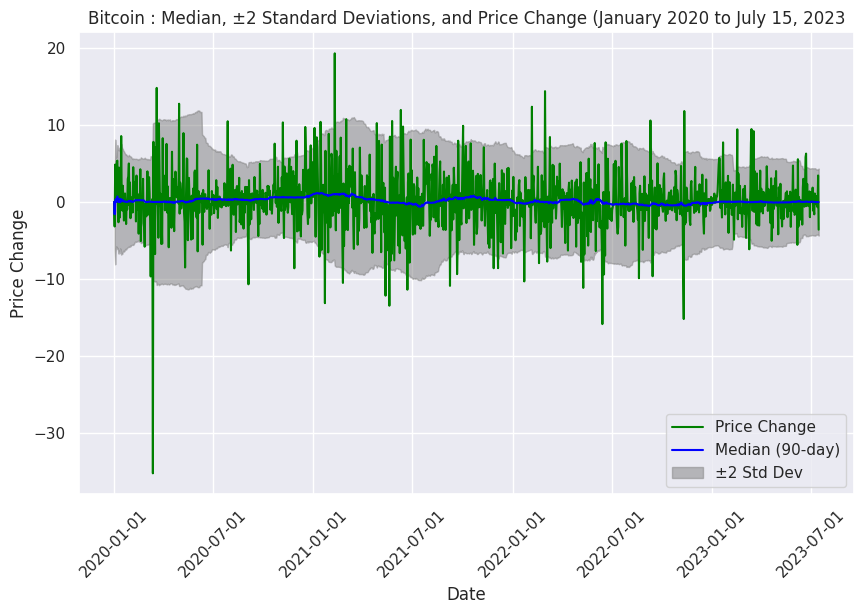

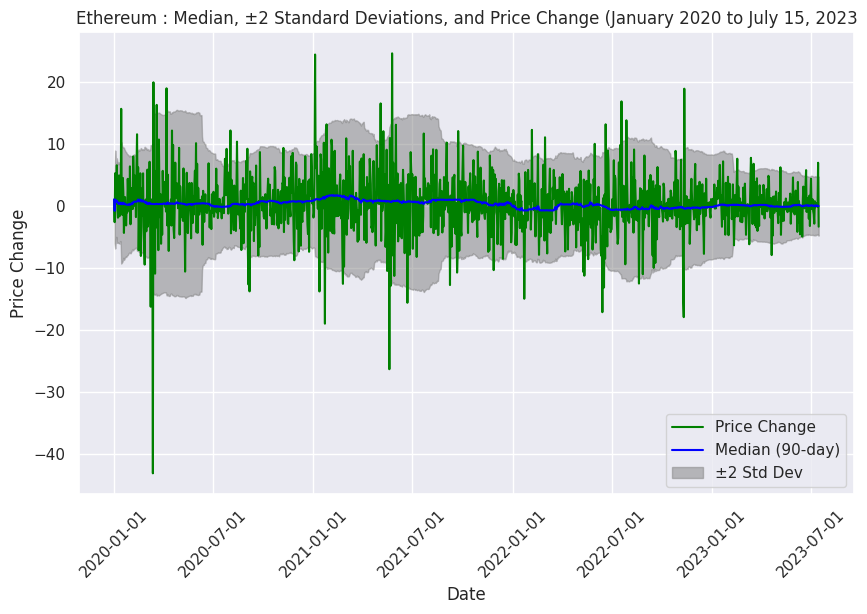

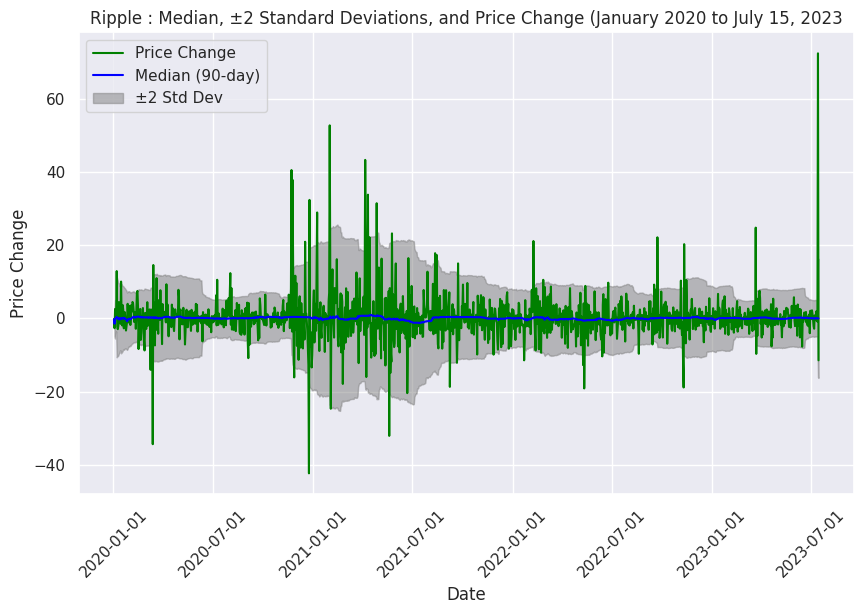

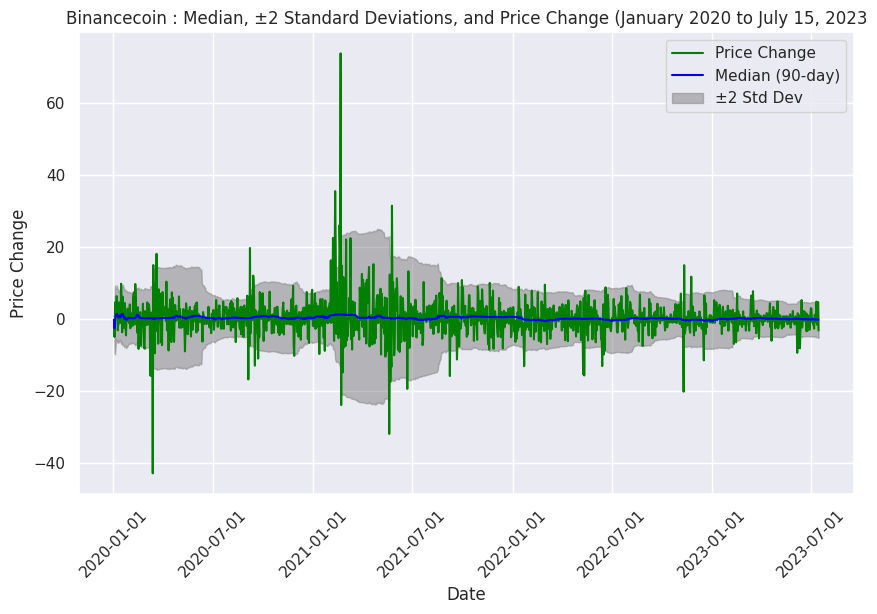

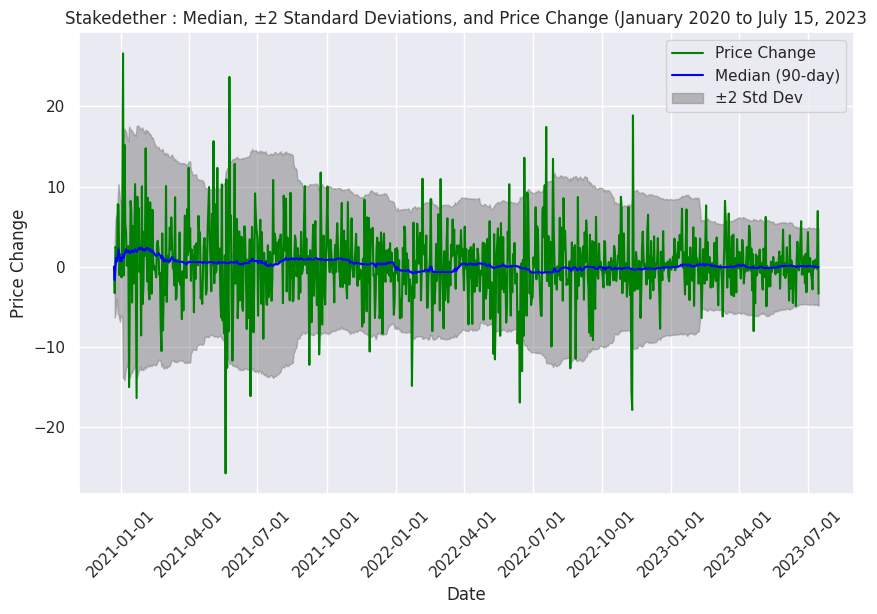

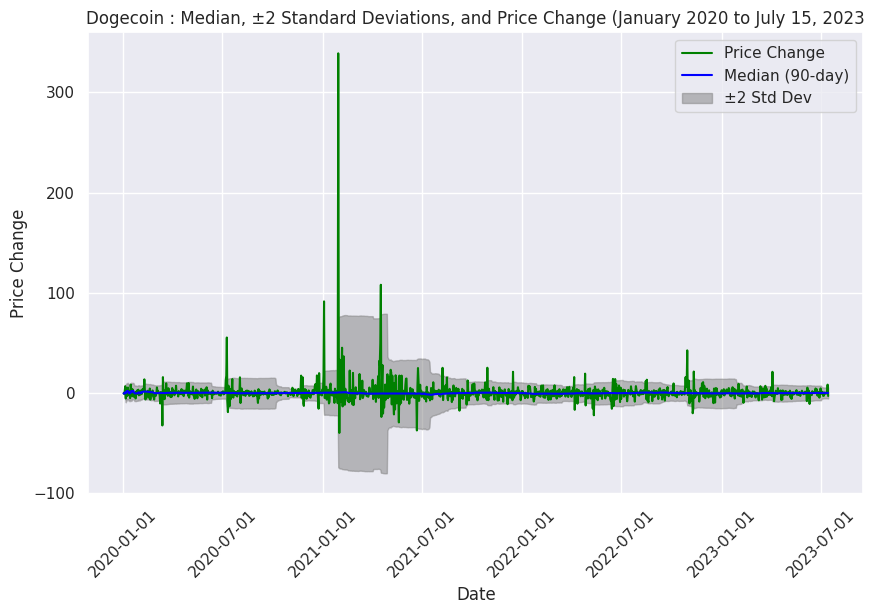

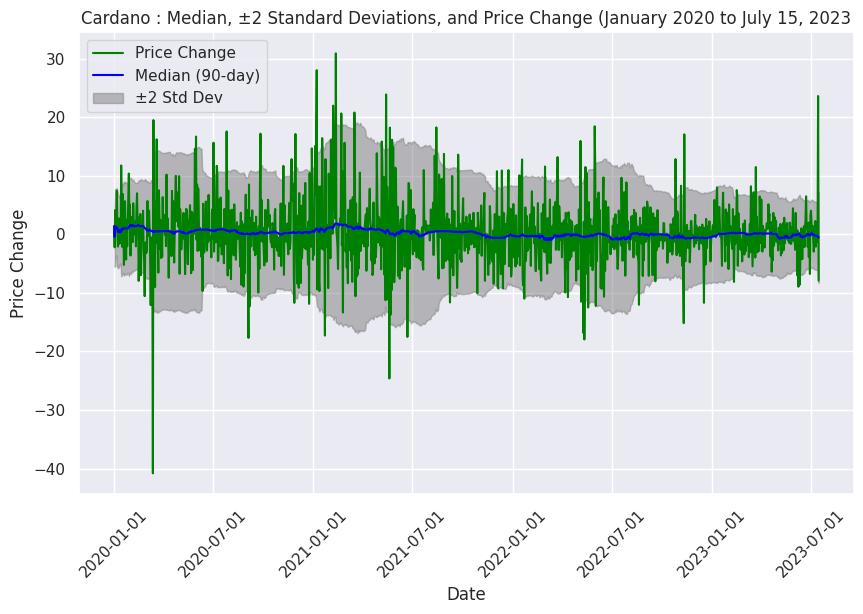

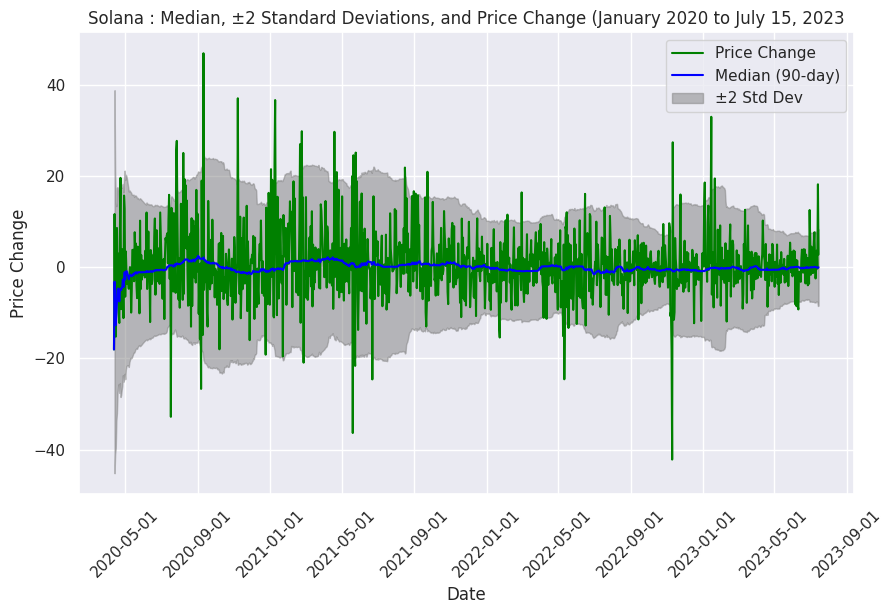

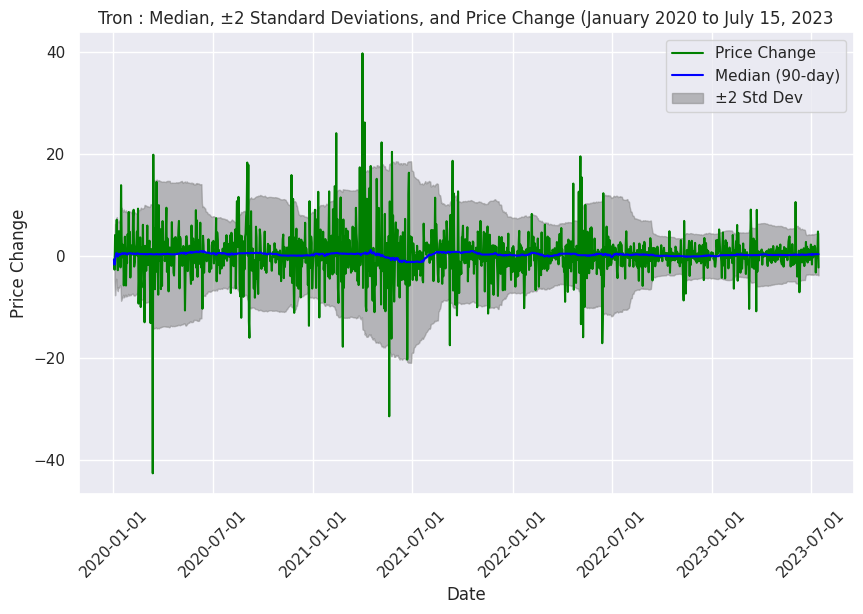

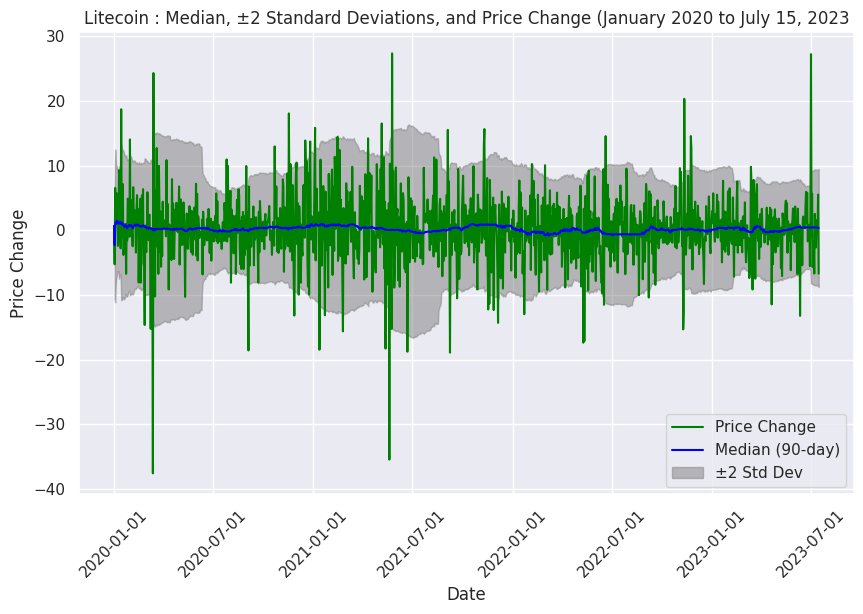

In [ ]:
import datetime as dt
import numpy as np

names= ['Bitcoin', 'Ethereum', 'Ripple', 'Binancecoin', 'Stakedether',
                 'Dogecoin', 'Cardano', 'Solana', 'Tron', 'Litecoin']


def identify_categorical_events(coin_data_list):
    for iter, coin in enumerate(coin_data_list):

          # Extract price and timestamp data from the JSON response
          data_points = coin['prices']
          timestamps = [data[0] for data in data_points]
          prices = [data[1] for data in data_points]

          # Convert timestamps to human-readable dates
          dates = [dt.datetime.fromtimestamp(ts / 1000).strftime('%Y-%m-%d') for ts in timestamps]

          # Calculate the daily price change
          price_change = [((prices[i] - prices[i-1]) / prices[i-1]) * 100 for i in range(1, len(prices))]

          # Convert the data into a DataFrame
          df = pd.DataFrame({'Date': dates[1:], 'Price_Change': price_change})

          df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
          df = df.set_index('Date')

          # Calculate the 90-day median daily price change
          df['Price_Change_90D_Median'] = df['Price_Change'].rolling(window=90, min_periods=1).median()
          median_90d = df['Price_Change_90D_Median']

          # Calculate the standard deviation of daily price changes over the 90-day period
          std_dev = df['Price_Change'].rolling(window=90, min_periods=1).std()

          upper_bound = median_90d + (2 * std_dev)
          lower_bound = median_90d - (2 * std_dev)

          # Create a figure and axis using Seaborn
          plt.figure(figsize=(10, 6))
          ax = sns.lineplot(data=df['Price_Change'], label='Price Change', color='green')
          sns.lineplot(data=median_90d, ax=ax, label='Median (90-day)', color='blue')

          # Plot the ±2 standard deviations using Matplotlib
          ax.fill_between(df.index, lower_bound, upper_bound, color='gray', alpha=0.5, label='±2 Std Dev')

          # Add labels and legend
          ax.set_xlabel('Date')
          ax.set_ylabel('Price Change')
          ax.set_title( str(names[iter]) + ' : Median, ±2 Standard Deviations, and Price Change (January 2020 to July 15, 2023')
          ax.legend()

          # Format date on the x-axis
          ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
          plt.xticks(rotation=45)


identify_categorical_events(coin_data_list)



In [ ]:
#coin_data_list[0]


dt.datetime.fromtimestamp(1659225600000 / 1000).strftime('%Y-%m-%d')

'2022-07-31'

In [ ]:
coin_data

,Date,Price_Change,Price_Change_90D_Median,Categorical_Event,Coin
13,2020-01-15,18.700305,1.213004,True,Litecoin
29,2020-01-31,14.038419,0.768347,True,Litecoin
56,2020-02-27,-14.657424,0.516293,True,Litecoin
67,2020-03-09,-15.253196,0.241239,True,Litecoin
71,2020-03-13,-37.586034,-0.002241,True,Litecoin
...,...,...,...,...,...
1171,2023-03-18,7.776038,0.271635,True,Litecoin
1174,2023-03-21,-7.493093,0.271635,True,Litecoin
1204,2023-04-20,-11.472929,-0.265463,True,Litecoin
1256,2023-06-11,-13.240063,0.481607,True,Litecoin


In [ ]:
# FOR S&P DATA
import yfinance as yf

In [ ]:
tickerSymbol = '^GSPC'
tickerData = yf.Ticker(tickerSymbol)
SP_data = tickerData.history(period ='id', start= '2020-01-01', end= '2023-7-15')
SP_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,3244.669922,3258.139893,3235.530029,3257.850098,3459930000,0.0,0.0
2020-01-03 00:00:00-05:00,3226.360107,3246.149902,3222.340088,3234.850098,3484700000,0.0,0.0
2020-01-06 00:00:00-05:00,3217.550049,3246.840088,3214.639893,3246.280029,3702460000,0.0,0.0
2020-01-07 00:00:00-05:00,3241.860107,3244.909912,3232.429932,3237.179932,3435910000,0.0,0.0
2020-01-08 00:00:00-05:00,3238.590088,3267.070068,3236.669922,3253.050049,3726840000,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000,0.0,0.0
2023-07-11 00:00:00-04:00,4415.549805,4443.640137,4408.459961,4439.259766,3624220000,0.0,0.0
2023-07-12 00:00:00-04:00,4467.689941,4488.339844,4463.229980,4472.160156,3920290000,0.0,0.0


In [ ]:
# Calculate price change and volume change
price_changes = []
volume_changes = []

for i in range(1, len(SP_data)):
    price_change = (SP_data['Close'].iloc[i] - SP_data['Close'].iloc[i - 1]) / SP_data['Close'].iloc[i - 1]
    volume_change = (SP_data['Volume'].iloc[i] - SP_data['Volume'].iloc[i - 1]) / SP_data['Volume'].iloc[i - 1]
    price_changes.append(price_change)
    volume_changes.append(volume_change)

# Calculate elasticity using a for loop
elasticities = []

for i in range(len(price_changes)):
    if price_changes[i] != 0:
        elasticity = volume_changes[i] / price_changes[i]
        elasticities.append(elasticity)
    else:
        elasticities.append(0)  # Avoid division by zero

# Add price change and elasticity columns to the DataFrame
SP_data['Price_Change'] = [None] + price_changes
SP_data['Elasticity'] = [None] + elasticities

mean_elasticity = np.mean(SP_data['Elasticity'].dropna())

# Print the DataFrame with price change and elasticity columns
print(SP_data)
print("Mean Elasticity:", mean_elasticity)

# Calculate correlation between 'Close' price and 'Volume' for each day
correlation_series = SP_data['Close'].corr(SP_data['Volume'])

# Calculate the mean correlation
mean_correlation = correlation_series.mean()

# Print the DataFrame, correlation for each day, and the mean correlation
print(SP_data)
print("\nCorrelation between Close price and Volume for each day:\n", correlation_series)
print("\nMean Correlation between Close price and Volume:", mean_correlation)

                                  Open         High          Low        Close  \
Date                                                                            
2020-01-02 00:00:00-05:00  3244.669922  3258.139893  3235.530029  3257.850098   
2020-01-03 00:00:00-05:00  3226.360107  3246.149902  3222.340088  3234.850098   
2020-01-06 00:00:00-05:00  3217.550049  3246.840088  3214.639893  3246.280029   
2020-01-07 00:00:00-05:00  3241.860107  3244.909912  3232.429932  3237.179932   
2020-01-08 00:00:00-05:00  3238.590088  3267.070068  3236.669922  3253.050049   
...                                ...          ...          ...          ...   
2023-07-10 00:00:00-04:00  4394.229980  4412.600098  4389.919922  4409.529785   
2023-07-11 00:00:00-04:00  4415.549805  4443.640137  4408.459961  4439.259766   
2023-07-12 00:00:00-04:00  4467.689941  4488.339844  4463.229980  4472.160156   
2023-07-13 00:00:00-04:00  4491.500000  4517.379883  4489.359863  4510.040039   
2023-07-14 00:00:00-04:00  4

In [ ]:
#calculating this between two days

# Calculate the 90-day median daily price change
SP_data['Price_Change_90D_Median'] = SP_data['Price_Change'].rolling(window=90, min_periods=1).median()

# Calculate the 90-day standard deviation of daily price changes
std_dev_90d = SP_data['Price_Change'].rolling(window=90, min_periods=1).std()

# Identify dates with categorical events
SP_data['Categorical_Event'] = (SP_data['Price_Change'] - SP_data['Price_Change_90D_Median']).abs() >= (2 * std_dev_90d)


# Filter the DataFrame to show only dates with categorical events
categorical_events_df = SP_data[SP_data['Categorical_Event']]

categorical_events_df['2 * std_dev_90d'] = 2 * std_dev_90d

# Print the DataFrame with categorical events and the new column
print(categorical_events_df[['Close', 'Price_Change', 'Price_Change_90D_Median', 'Categorical_Event', '2 * std_dev_90d']])

                                 Close  Price_Change  Price_Change_90D_Median  \
Date                                                                            
2020-01-27 00:00:00-05:00  3243.629883     -0.015731                 0.000715   
2020-01-31 00:00:00-05:00  3225.520020     -0.017706                 0.000715   
2020-02-24 00:00:00-05:00  3225.889893     -0.033514                 0.001688   
2020-02-25 00:00:00-05:00  3128.209961     -0.030280                 0.001415   
2020-02-27 00:00:00-05:00  2978.760010     -0.044163                 0.000715   
2020-03-02 00:00:00-05:00  3090.229980      0.046039                 0.000715   
2020-03-04 00:00:00-05:00  3130.120117      0.042203                 0.000715   
2020-03-05 00:00:00-05:00  3023.939941     -0.033922                 0.000289   
2020-03-09 00:00:00-04:00  2746.560059     -0.075970                -0.000867   
2020-03-10 00:00:00-04:00  2882.229980      0.049396                -0.000289   
2020-03-11 00:00:00-04:00  2

<ipython-input-90-3e90149154ae>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_events_df['2 * std_dev_90d'] = 2 * std_dev_90d


In [ ]:
categorical_events_df.reset_index(inplace=True)

# Print the DataFrame with categorical events and the date as a separate column
print(categorical_events_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Price_Change', 'Elasticity', 'Price_Change_90D_Median','2 * std_dev_90d', 'Categorical_Event']])

                        Date         Open         High          Low  \
0  2020-01-27 00:00:00-05:00  3247.159912  3258.850098  3234.500000   
1  2020-01-31 00:00:00-05:00  3282.330078  3282.330078  3214.679932   
2  2020-02-24 00:00:00-05:00  3257.610107  3259.810059  3214.649902   
3  2020-02-25 00:00:00-05:00  3238.939941  3246.989990  3118.770020   
4  2020-02-27 00:00:00-05:00  3062.540039  3097.070068  2977.389893   
5  2020-03-02 00:00:00-05:00  2974.280029  3090.959961  2945.189941   
6  2020-03-04 00:00:00-05:00  3045.750000  3130.969971  3034.379883   
7  2020-03-05 00:00:00-05:00  3075.699951  3083.040039  2999.830078   
8  2020-03-09 00:00:00-04:00  2863.889893  2863.889893  2734.429932   
9  2020-03-10 00:00:00-04:00  2813.479980  2882.590088  2734.000000   
10 2020-03-11 00:00:00-04:00  2825.600098  2825.600098  2707.219971   
11 2020-03-12 00:00:00-04:00  2630.860107  2660.949951  2478.860107   
12 2020-03-13 00:00:00-04:00  2569.989990  2711.330078  2492.370117   
13 202

In [ ]:
print(len(categorical_events_df[['Date','Close', 'Price_Change', 'Price_Change_90D_Median', 'Categorical_Event','2 * std_dev_90d']]))

53


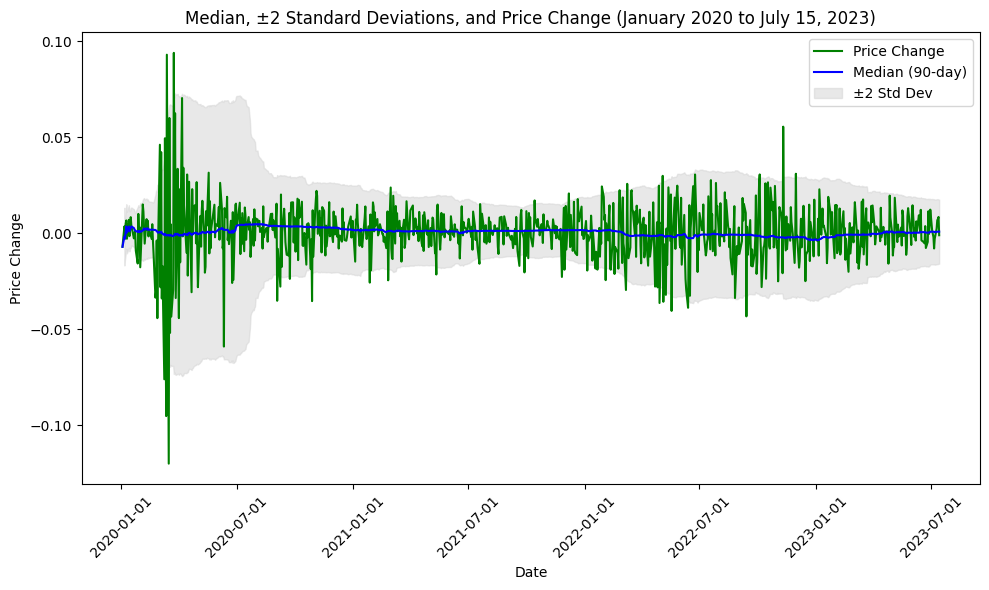

In [ ]:
import matplotlib.dates as mdates


# Define the start and end dates for the plot
start_date = '2020-01-01'
end_date = '2023-07-15'

# Slice the DataFrame to include data within the specified date range
plot_data = SP_data.loc[start_date:end_date]

# Calculate the median and ±2 standard deviations within the specified date range
median_90d = plot_data['Price_Change'].rolling(window=90, min_periods=1).median()
std_dev_90d = plot_data['Price_Change'].rolling(window=90, min_periods=1).std()
upper_bound = median_90d + (2 * std_dev_90d)
lower_bound = median_90d - (2 * std_dev_90d)

# Create a figure and axis using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=plot_data['Price_Change'], label='Price Change', color='green')
sns.lineplot(data=median_90d, ax=ax, label='Median (90-day)', color='blue')

# Plot the ±2 standard deviations using Matplotlib
ax.fill_between(plot_data.index, lower_bound, upper_bound, color='lightgray', alpha=0.5, label='±2 Std Dev')

# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Price Change')
ax.set_title('Median, ±2 Standard Deviations, and Price Change (January 2020 to July 15, 2023)')
ax.legend()

# Format date on the x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
categorical_events_df[['Date','Close', 'Price_Change', 'Price_Change_90D_Median', 'Categorical_Event']].to_csv('categorical_events.csv', index=False)

In [ ]:

# Save the DataFrame to a CSV file
categorical_events_df.to_csv('categorical_events.csv', index=False)

In [ ]:
S = pd.read_csv('categorical_events.csv',index_col=0)

# Print the DataFrame
print(S)

                            Date         Open         High          Low  \
index                                                                     
0      2020-01-27 00:00:00-05:00  3247.159912  3258.850098  3234.500000   
1      2020-01-31 00:00:00-05:00  3282.330078  3282.330078  3214.679932   
2      2020-02-24 00:00:00-05:00  3257.610107  3259.810059  3214.649902   
3      2020-02-25 00:00:00-05:00  3238.939941  3246.989990  3118.770020   
4      2020-02-27 00:00:00-05:00  3062.540039  3097.070068  2977.389893   
5      2020-03-02 00:00:00-05:00  2974.280029  3090.959961  2945.189941   
6      2020-03-04 00:00:00-05:00  3045.750000  3130.969971  3034.379883   
7      2020-03-05 00:00:00-05:00  3075.699951  3083.040039  2999.830078   
8      2020-03-09 00:00:00-04:00  2863.889893  2863.889893  2734.429932   
9      2020-03-10 00:00:00-04:00  2813.479980  2882.590088  2734.000000   
10     2020-03-11 00:00:00-04:00  2825.600098  2825.600098  2707.219971   
11     2020-03-12 00:00:0

In [ ]:
# the list of dates for which the 2+ standard deviation away from 90-day median daily price change
S['Date']

index
0     2020-01-27 00:00:00-05:00
1     2020-01-31 00:00:00-05:00
2     2020-02-24 00:00:00-05:00
3     2020-02-25 00:00:00-05:00
4     2020-02-27 00:00:00-05:00
5     2020-03-02 00:00:00-05:00
6     2020-03-04 00:00:00-05:00
7     2020-03-05 00:00:00-05:00
8     2020-03-09 00:00:00-04:00
9     2020-03-10 00:00:00-04:00
10    2020-03-11 00:00:00-04:00
11    2020-03-12 00:00:00-04:00
12    2020-03-13 00:00:00-04:00
13    2020-03-16 00:00:00-04:00
14    2020-03-24 00:00:00-04:00
15    2020-09-03 00:00:00-04:00
16    2020-09-08 00:00:00-04:00
17    2020-09-23 00:00:00-04:00
18    2020-10-28 00:00:00-04:00
19    2021-01-27 00:00:00-05:00
20    2021-02-25 00:00:00-05:00
21    2021-03-01 00:00:00-05:00
22    2021-05-12 00:00:00-04:00
23    2021-07-19 00:00:00-04:00
24    2021-09-20 00:00:00-04:00
25    2021-09-28 00:00:00-04:00
26    2021-09-30 00:00:00-04:00
27    2021-10-04 00:00:00-04:00
28    2021-10-14 00:00:00-04:00
29    2021-11-26 00:00:00-05:00
30    2021-11-30 00:00:00-05:00
31